# Capítulo 4. Modelos de Entrenamiento

## Modelos de Entrenamiento — Qué son y para qué sirven

---

## 1. Regresión Lineal
**Qué es:**  
Un modelo que busca una relación lineal entre variables predictoras y una variable objetivo.

**Para qué sirve:**  
- Predecir valores numéricos continuos.
- Modelar relaciones simples entre variables.

---

### 1.1 Ecuación Normal
**Qué es:**  
Una fórmula cerrada que calcula directamente los parámetros óptimos sin iteraciones.

**Para qué sirve:**  
- Entrenar regresión lineal de manera exacta.
- Funciona bien con datasets pequeños o medianos.

---

### 1.2 Regresor Lineal de Scikit-Learn
**Qué es:**  
La implementación en scikit-learn del modelo de regresión lineal.

**Para qué sirve:**  
- Entrenar modelos lineales fácilmente.
- Integrarse con validación, métricas y pipelines.

---

## 2. Descenso del Gradiente
**Qué es:**  
Un método iterativo para optimizar parámetros reduciendo el error paso a paso.

**Para qué sirve:**  
- Entrenar modelos cuando no existe solución cerrada.
- Escalar a grandes volúmenes de datos.

---

### 2.1 Descenso del Gradiente por Lote (Batch GD)
**Qué es:**  
Actualiza los parámetros usando todo el dataset en cada iteración.

**Para qué sirve:**  
- Obtener actualizaciones precisas y estables.

---

### 2.2 Descenso del Gradiente Estocástico (SGD)
**Qué es:**  
Actualiza los parámetros usando una sola muestra en cada iteración.

**Para qué sirve:**  
- Entrenar rápidamente con datos grandes.
- Explorar mejor el espacio de soluciones (aunque con más ruido).

---

## 3. Regresión Polinomial
**Qué es:**  
Extiende la regresión lineal agregando términos polinomiales para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar curvas y patrones complejos.
- Ajustar relaciones no lineales entre variables.

---

## 4. Curvas de Aprendizaje
**Qué es:**  
Gráficos que muestran el rendimiento del modelo en función del número de ejemplos o iteraciones.

**Para qué sirve:**  
- Diagnosticar sobreajuste (overfitting) y subajuste (underfitting).
- Decidir si se necesita más datos o un modelo más complejo.

---

## 5. Regularización de Modelos Lineales
**Qué es:**  
Métodos que penalizan parámetros grandes para evitar sobreajuste.

**Para qué sirve:**  
- Mejorar la capacidad de generalización.
- Controlar la complejidad del modelo.

---

### 5.1 Ridge (Regularización L2)
**Qué es:**  
Penalización basada en el cuadrado de los coeficientes.

**Para qué sirve:**  
- Reducir sobreajuste manteniendo coeficientes pequeños.
- Funciona bien con variables correlacionadas.

---

### 5.2 Lasso (Regularización L1)
**Qué es:**  
Penalización basada en la suma de los valores absolutos de los coeficientes.

**Para qué sirve:**  
- Realizar selección de características (coeficientes se vuelven cero).
- Simplificar modelos automáticamente.

---

### 5.3 Elastic Net
**Qué es:**  
Combinación de las penalizaciones L1 y L2.

**Para qué sirve:**  
- Aprovechar beneficios de Ridge y Lasso.
- Manejar datasets con variables muy correlacionadas.

---

## 6. Regresión Logística
**Qué es:**  
Modelo lineal que utiliza la función sigmoide para estimar probabilidades.

**Para qué sirve:**  
- Resolver problemas de clasificación binaria.
- Interpretar resultados como probabilidades.

---

## 7. Regresión Softmax
**Qué es:**  
Extensión de la regresión logística para múltiples clases.

**Para qué sirve:**  
- Clasificación multiclase.
- Modelos donde las clases son mutuamente excluyentes.


## <span style="color:green">1. Regresión Lineal</span>

#### <span style="color:blue"> 1.1 Ecuación Normal </span>

In [147]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
# Generar el set de juguete de datos lineales aleatorios
import numpy as np

# Generar valores de x aleatorios
x = np.random.rand(100) * 10  # 100 valores entre 0 y 10

# Generar valores de y con una relación lineal y algo de ruido
y = 2.5 * x + np.random.randn(100) * 5  # Pendiente de 2.5 con ruido

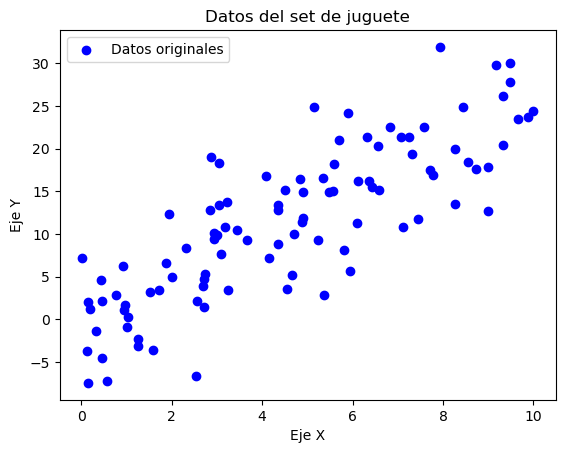

In [149]:
# Gráfica los datos del set de juguete
import matplotlib.pyplot as plt

# Graficar los datos generados
plt.scatter(x, y, color='blue', label='Datos originales')
plt.title('Datos del set de juguete')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

In [150]:
# Agregar el valor de x0
import numpy as np

# Crear una matriz X con una columna adicional de unos para x0
X = np.c_[np.ones(x.shape[0]), x]

# Aplicar la ecuación normal
# Calcular los parámetros óptimos usando la fórmula cerrada
# Fórmula: theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Visualizar los parámetros calculados
print("Parámetros calculados (theta):", theta)

Parámetros calculados (theta): [-0.47316678  2.6137194 ]


👀: Aquí no tendrán los mismos datos que yo, es normal por los factores de aleatoriedad

📝:El primer valor de la matriz es la pendiente y el segundo es la intersección 

In [151]:
# Prueba estos datos con un vector de prueba
import numpy as np

# Crear un vector de prueba
x_test = np.array([1, 2, 3, 4, 5])

# Generar predicciones usando los parámetros calculados con la ecuación normal
y_pred_test = theta[0] + theta[1] * x_test

# Mostrar los resultados
print("Vector de prueba:", x_test)
print("Predicciones:", y_pred_test)

Vector de prueba: [1 2 3 4 5]
Predicciones: [ 2.14055262  4.75427203  7.36799143  9.98171084 12.59543024]


In [152]:
# Agregar X0=1
import numpy as np

# Crear una matriz X con una columna adicional de unos para x0
X = np.c_[np.ones(x.shape[0]), x]

# Mostrar la matriz X
print("Matriz X con columna de unos:")
print(X)

Matriz X con columna de unos:
[[1.         1.26300694]
 [1.         0.95938123]
 [1.         3.17180927]
 [1.         4.90257409]
 [1.         0.15017959]
 [1.         4.34479471]
 [1.         0.46530026]
 [1.         0.20134179]
 [1.         1.51394161]
 [1.         1.00361518]
 [1.         6.82707734]
 [1.         4.83611113]
 [1.         8.26806066]
 [1.         8.25409163]
 [1.         6.42687144]
 [1.         1.57710825]
 [1.         1.25062753]
 [1.         5.94994339]
 [1.         6.35823809]
 [1.         4.15634173]
 [1.         4.90412966]
 [1.         3.09813644]
 [1.         7.94038402]
 [1.         4.70517624]
 [1.         7.305236  ]
 [1.         5.69648657]
 [1.         8.54702019]
 [1.         8.98996776]
 [1.         1.02657301]
 [1.         9.31945921]
 [1.         5.47233219]
 [1.         9.87152597]
 [1.         8.99648595]
 [1.         6.57944439]
 [1.         0.43699214]
 [1.         6.10947039]
 [1.         2.94327103]
 [1.         7.76793565]
 [1.         5.37134

In [153]:
# Hacer las predicciones con la ecuación normal
import numpy as np

# Usar los parámetros calculados (theta) para hacer predicciones
y_pred = X @ theta

# Mostrar las predicciones
print("Predicciones:", y_pred)

Predicciones: [ 2.82797896  2.03438656  7.81705266 12.34078625 -0.08063949 10.88290745
  0.74299755  0.05308417  3.48385178  2.15000168 17.37089775 12.16707073
 21.13722382 21.10071269 16.32487181  3.64895165  2.79562267 15.07831573
 16.1454835  10.39034425 12.34485206  7.62449255 20.28076901 11.82484365
 18.62067031 14.4158507  21.86634575 23.0240864   2.21000702 23.88528459
 13.82997406 25.32823221 23.04112312 16.7236547   0.66900805 15.49527452
  7.21971782 19.83003737 13.56601894  4.04031878 11.44141542  6.68594222
  4.78735696  6.14758784 13.220066   19.65541739 24.31258475  8.01212137
 24.31753333  1.55188822 23.92757523 11.70792715  7.50925871 14.09770856
  8.50406368 11.3112205   6.97538209  7.02122718  7.35893426  5.55817826
 -0.13530736  1.96960455 13.00280184  4.4453705   6.63612382 12.29589657
 22.33708664 14.9598593  10.90793186  0.99741735 16.03869552 25.6497079
  7.9654201  18.96719618 -0.06423764  4.6230559   0.35997709 10.89263367
 21.57603957 18.119842   13.51286415 1

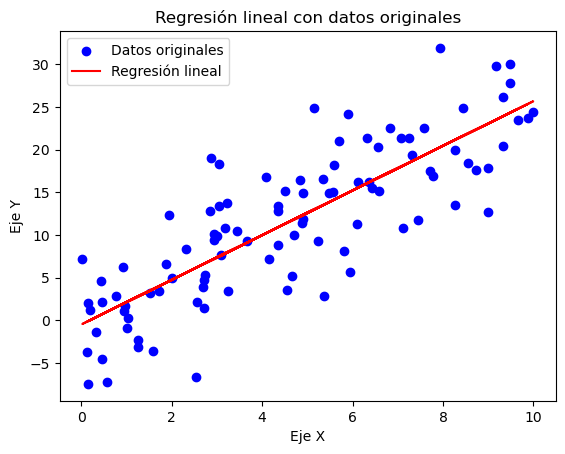

In [154]:
# Graficar la regresión con los datos originales y la predicción
import matplotlib.pyplot as plt

# Graficar los datos originales
plt.scatter(x, y, color='blue', label='Datos originales')

# Graficar la línea de regresión
plt.plot(x, y_pred, color='red', label='Regresión lineal')

# Configurar el gráfico
plt.title('Regresión lineal con datos originales')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

#### <span style="color:blue"> 1.2 Regresor Linear de Scikit </span>

In [155]:
# Haz la regresión con scikit-learn
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(x.reshape(-1, 1), y)

# Obtener los parámetros calculados
interseccion = model.intercept_
pendiente = model.coef_[0]

# Mostrar los parámetros
print("Intersección:", interseccion)
print("Pendiente:", pendiente)

Intersección: -0.47316678264677137
Pendiente: 2.613719404976814


Los parámetros son iguales a los que obtuvimos en el método anterior. En este caso, tendrías que evaluar el costo que implica cada método a tu ordenador. 

***

## <span style="color:green">2. Descenso del Gradiente</span>

Algoritmo de optimización. Signfica una alternativa a la ecuación normal

#### <span style="color:blue"> 2.1 Descenso del Gradiente por Lote</span>

**Derivada parcial de la función de costo (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Vector del Gradiente de la función de costo** 

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Step del descenso del Gradiente**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [156]:
# Definir la tasa de aprendizaje y las iteraciones
learning_rate = 0.01
n_iterations = 1000

# Número de datos
m = len(y)

# Inicializar los parámetros (pendiente e intersección)
pendiente = 0
interseccion = 0

In [157]:
# Implementar el descenso del gradiente
for i in range(n_iterations):
    # Calcular las predicciones
    y_pred = pendiente * x + interseccion

    # Calcular los gradientes
    grad_pendiente = -(2/m) * sum(x * (y - y_pred))
    grad_interseccion = -(2/m) * sum(y - y_pred)

    # Actualizar los parámetros
    pendiente -= learning_rate * grad_pendiente
    interseccion -= learning_rate * grad_interseccion

# Mostrar los parámetros finales
print("Pendiente final:", pendiente)
print("Intersección final:", interseccion)

Pendiente final: 2.6131632416243673
Intersección final: -0.4696706087501917


Los resultados nos da extremadamente cercano a los datos obtenidos con la ecuación normal. Ojo: recuerda que el descenso del gradiente es un método de aproximación 

In [158]:
# Repetir el ejercicio con diferentes tasas de aprendizaje
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    pendiente = 0
    interseccion = 0
    
    for i in range(n_iterations):
        y_pred = pendiente * x + interseccion
        grad_pendiente = -(2/m) * sum(x * (y - y_pred))
        grad_interseccion = -(2/m) * sum(y - y_pred)
        pendiente -= lr * grad_pendiente
        interseccion -= lr * grad_interseccion

    print(f"Tasa de aprendizaje: {lr}")
    print("Pendiente final:", pendiente)
    print("Intersección final:", interseccion)

Tasa de aprendizaje: 0.001
Pendiente final: 2.53414306455522
Intersección final: 0.027068845866397302
Tasa de aprendizaje: 0.01
Pendiente final: 2.6131632416243673
Intersección final: -0.4696706087501917
Tasa de aprendizaje: 0.1
Pendiente final: nan
Intersección final: nan


C:\Users\zapaf\AppData\Local\Temp\ipykernel_16284\4258889804.py:10: RuntimeWarning: overflow encountered in scalar add
  grad_pendiente = -(2/m) * sum(x * (y - y_pred))
C:\Users\zapaf\AppData\Local\Temp\ipykernel_16284\4258889804.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  pendiente -= lr * grad_pendiente


**Ejercicio Extra**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch 

***

#### <span style="color:blue"> 2.2 Descenso del Gradiente Estocástico</span>

Debido a qué la complejidad computacional del descenso del gradiente de lote es alto, podemos ver el descenso del gradiente estocástico para poder mejorar las predicción.

**Ventajas**: Puedes trabajar con más datos, escapa de los mínimos locales. 
**Desventajas:** No es tan exacto como los otros métodos. Sin embargo, su variación es despreciable

In [159]:
# Implementar el descenso del gradiente estocástico
import numpy as np

# Definir hiperparámetros
epochs = 50
learning_rate = 0.01
m = len(y)

# Inicializar parámetros
pendiente = 0
interseccion = 0

# Implementar el algoritmo
for epoch in range(epochs):
    for i in range(m):
        # Seleccionar un índice aleatorio
        random_index = np.random.randint(m)
        x_i = x[random_index]
        y_i = y[random_index]

        # Calcular el gradiente
        grad_pendiente = -2 * x_i * (y_i - (pendiente * x_i + interseccion))
        grad_interseccion = -2 * (y_i - (pendiente * x_i + interseccion))

        # Actualizar los parámetros
        pendiente -= learning_rate * grad_pendiente
        interseccion -= learning_rate * grad_interseccion

# Mostrar los parámetros finales
print("Pendiente final:", pendiente)
print("Intersección final:", interseccion)

Pendiente final: 2.0871287867043704
Intersección final: 0.16636132037468093


Aunque existe variación con el resultado de los métodos anteriores, la diferencia es mínima

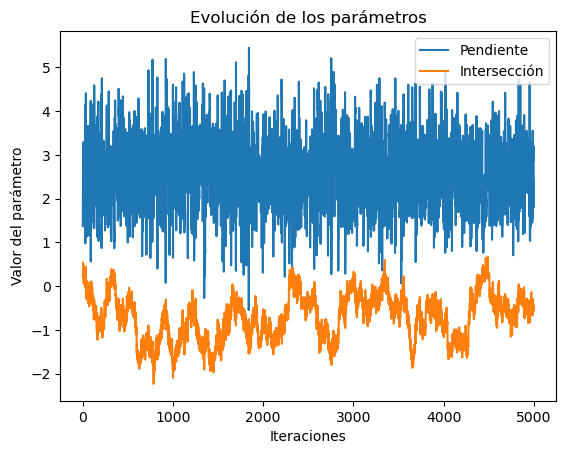

In [160]:
# Visualizar los gradientes realizados en el descenso estocástico
import matplotlib.pyplot as plt

# Inicializar listas para guardar los valores de pendiente e intersección
pendientes = []
intersecciones = []

# Repetir el descenso estocástico y guardar los valores
pendiente = 0
interseccion = 0
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = x[random_index]
        y_i = y[random_index]
        grad_pendiente = -2 * x_i * (y_i - (pendiente * x_i + interseccion))
        grad_interseccion = -2 * (y_i - (pendiente * x_i + interseccion))
        pendiente -= learning_rate * grad_pendiente
        interseccion -= learning_rate * grad_interseccion
        pendientes.append(pendiente)
        intersecciones.append(interseccion)

# Graficar los gradientes
plt.plot(pendientes, label='Pendiente')
plt.plot(intersecciones, label='Intersección')
plt.title('Evolución de los parámetros')
plt.xlabel('Iteraciones')
plt.ylabel('Valor del parámetro')
plt.legend()
plt.show()

In [161]:
# Implementar el descenso del gradiente estocástico con scikit-learn
from sklearn.linear_model import SGDRegressor

# Crear el modelo de regresión SGD
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)

# Ajustar el modelo a los datos
sgd_model.fit(x.reshape(-1, 1), y)

# Obtener los parámetros calculados
interseccion_sgd = sgd_model.intercept_[0]
pendiente_sgd = sgd_model.coef_[0]

# Mostrar los parámetros
print("Intersección (SGD):", interseccion_sgd)
print("Pendiente (SGD):", pendiente_sgd)

Intersección (SGD): -0.5315487601606222
Pendiente (SGD): 2.6792522250538187


In [162]:
#Visualiza la lista normal que genera .ravel


👀: Con este método si existió una variación importante en los resultados obtenidos. Es cuestión de criterio el sacrificar exactitud por costo computacional o viceversa.

***

## <span style="color:green">3. Regresión polinomial</span>

Regresión polinomial es una regresión linel a la cual le agregamos ecuaciones con potencia más elevada

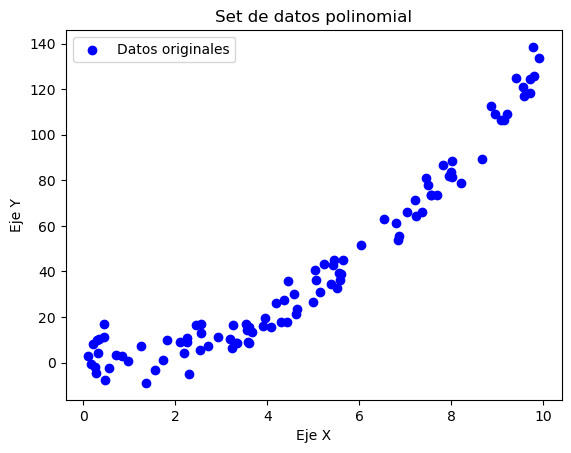

In [163]:
# Generar un set de datos de juguete para regresión polinomial
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
x_poly = np.random.rand(100) * 10  # 100 valores entre 0 y 10
y_poly = 1.5 * x_poly**2 - 2 * x_poly + 3 + np.random.randn(100) * 5  # Relación polinomial con ruido

# Graficar los datos
plt.scatter(x_poly, y_poly, color='blue', label='Datos originales')
plt.title('Set de datos polinomial')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

No hay una función en scikit para hacer regresiones polinomiales como tal. Pero podemos utilizar PolynomialFeature que toma los valores de x y los eleva a una potencia especificada. 

In [164]:
# Importar PolynomialFeatures para transformar los datos
from sklearn.preprocessing import PolynomialFeatures

# Crear características polinomiales de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_poly.reshape(-1, 1))

# Mostrar las características transformadas
print("Características polinomiales:")
print(X_poly)

Características polinomiales:
[[1.00000000e+00 9.57821494e+00 9.17422015e+01]
 [1.00000000e+00 8.03045475e+00 6.44882034e+01]
 [1.00000000e+00 9.70829072e+00 9.42509086e+01]
 [1.00000000e+00 9.92104023e+00 9.84270393e+01]
 [1.00000000e+00 2.55309429e+00 6.51829048e+00]
 [1.00000000e+00 3.19705026e+00 1.02211303e+01]
 [1.00000000e+00 5.51927307e+00 3.04623752e+01]
 [1.00000000e+00 9.21876820e+00 8.49856871e+01]
 [1.00000000e+00 3.32899250e+00 1.10821911e+01]
 [1.00000000e+00 4.43070831e+00 1.96311762e+01]
 [1.00000000e+00 1.08345487e-01 1.17387445e-02]
 [1.00000000e+00 7.03911872e+00 4.95491923e+01]
 [1.00000000e+00 7.23044378e+00 5.22793172e+01]
 [1.00000000e+00 5.04311764e+00 2.54330355e+01]
 [1.00000000e+00 1.98435435e-01 3.93766218e-02]
 [1.00000000e+00 9.41389758e+00 8.86214676e+01]
 [1.00000000e+00 2.17907065e+00 4.74834889e+00]
 [1.00000000e+00 7.20434098e+00 5.19025289e+01]
 [1.00000000e+00 8.94838083e+00 8.00735194e+01]
 [1.00000000e+00 4.19336100e+00 1.75842764e+01]
 [1.000000

In [165]:
# Hacer una regresión lineal sobre los datos polinomiales
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
poly_model = LinearRegression()

# Ajustar el modelo a los datos polinomiales
poly_model.fit(X_poly, y_poly)

# Obtener los parámetros
interseccion_poly = poly_model.intercept_
coeficientes_poly = poly_model.coef_

# Mostrar los parámetros
print("Intersección:", interseccion_poly)
print("Coeficientes:", coeficientes_poly)

Intersección: 3.153196774319987
Coeficientes: [ 0.         -1.78883896  1.48316887]


Primero aparece el dato de la intersección y luego aparece los coeficientes de de x y x2, respectivamente

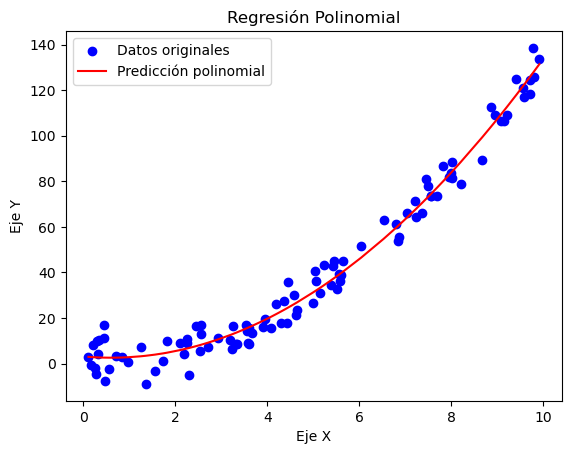

In [166]:
# Graficar la predicción de PolynomialFeatures y los datos originales
import numpy as np
import matplotlib.pyplot as plt

# Generar predicciones
y_poly_pred = poly_model.predict(X_poly)

# Graficar los datos originales
plt.scatter(x_poly, y_poly, color='blue', label='Datos originales')

# Graficar la predicción
plt.plot(np.sort(x_poly), y_poly_pred[np.argsort(x_poly)], color='red', label='Predicción polinomial')

# Configurar el gráfico
plt.title('Regresión Polinomial')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

**Ejercicio**: calcular la suma de los errores al cuadrado  y compararlo con una predicción lineal

***

## <span style="color:green">4. Curvas de Aprendizaje</span>

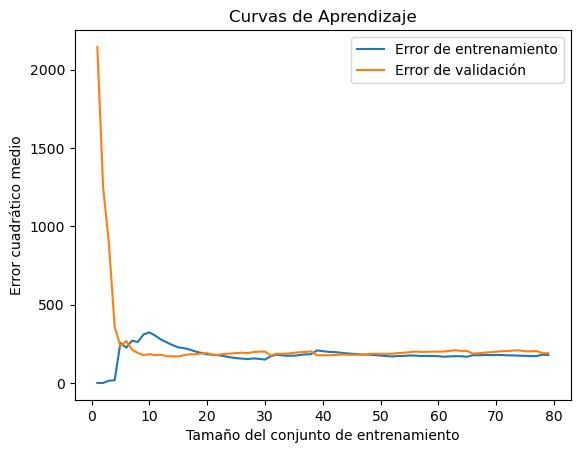

In [167]:
# Importar mean_squared_error y train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_poly.reshape(-1, 1), y_poly, test_size=0.2, random_state=42)

# Inicializar listas para errores
train_errors = []
val_errors = []

# Ajustar el modelo con diferentes tamaños de datos de entrenamiento
for m in range(1, len(x_train)):
    poly_model.fit(x_train[:m], y_train[:m])
    y_train_pred = poly_model.predict(x_train[:m])
    y_val_pred = poly_model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Graficar las curvas de aprendizaje
plt.plot(range(1, len(x_train)), train_errors, label='Error de entrenamiento')
plt.plot(range(1, len(x_train)), val_errors, label='Error de validación')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.show()

In [168]:
# Importar LogisticRegression
from sklearn.linear_model import LogisticRegression

In [169]:
# Crear un pipeline para regresión polinomial y lineal
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Definir el pipeline
regresion_polinomial = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])

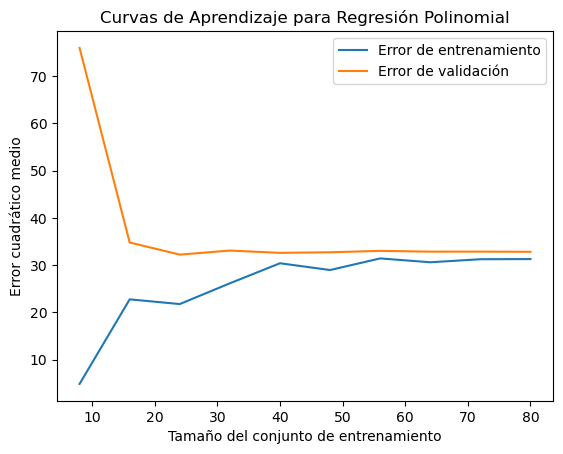

In [170]:
# Ejecutar curvas de aprendizaje para el pipeline de regresión polinomial
from sklearn.model_selection import learning_curve

# Generar curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    regresion_polinomial, x_poly.reshape(-1, 1), y_poly, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular promedios y desviaciones estándar
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_errors, label='Error de entrenamiento')
plt.plot(train_sizes, val_errors, label='Error de validación')
plt.title('Curvas de Aprendizaje para Regresión Polinomial')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.show()

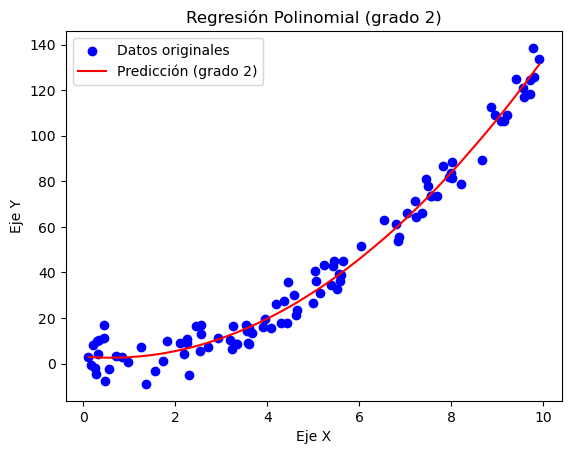

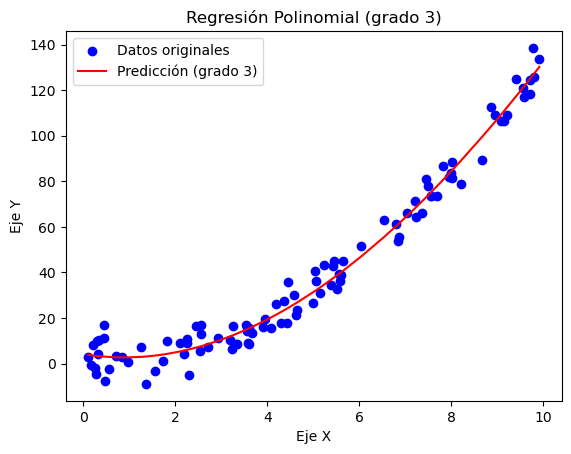

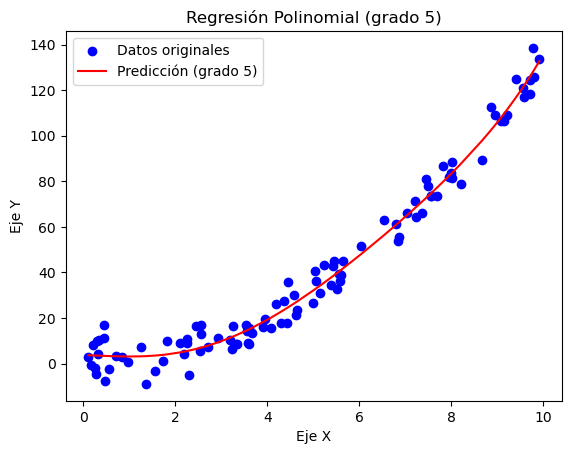

In [171]:
# Variar el grado del polinomio para mejorar el rendimiento del modelo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Probar diferentes grados de polinomio
degrees = [2, 3, 5]

for degree in degrees:
    # Crear el pipeline para el grado actual
    regresion_polinomial = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('lin_reg', LinearRegression())
    ])

    # Ajustar el modelo
    regresion_polinomial.fit(x_poly.reshape(-1, 1), y_poly)

    # Generar predicciones
    y_poly_pred = regresion_polinomial.predict(x_poly.reshape(-1, 1))

    # Graficar los datos originales y la predicción
    plt.scatter(x_poly, y_poly, color='blue', label='Datos originales')
    plt.plot(np.sort(x_poly), y_poly_pred[np.argsort(x_poly)], label=f'Predicción (grado {degree})', color='red')
    plt.title(f'Regresión Polinomial (grado {degree})')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.legend()
    plt.show()

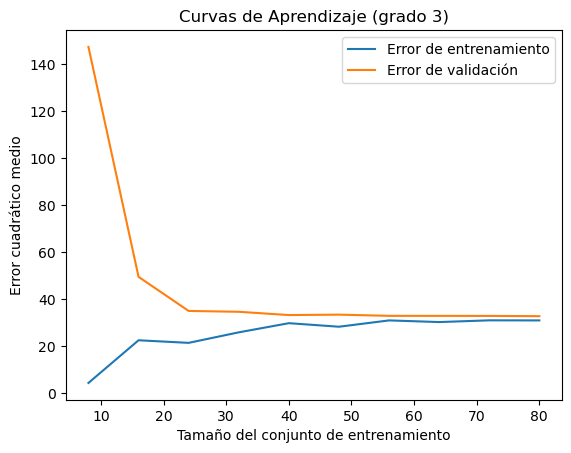

In [172]:
# Correr la curva de aprendizaje para el mejor grado de polinomio
from sklearn.model_selection import learning_curve

# Seleccionar el mejor grado (por ejemplo, grado 3)
mejor_grado = 3
regresion_polinomial = Pipeline([
    ('poly_features', PolynomialFeatures(degree=mejor_grado)),
    ('lin_reg', LinearRegression())
])

# Generar curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    regresion_polinomial, x_poly.reshape(-1, 1), y_poly, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular promedios y desviaciones estándar
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_errors, label='Error de entrenamiento')
plt.plot(train_sizes, val_errors, label='Error de validación')
plt.title(f'Curvas de Aprendizaje (grado {mejor_grado})')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.show()

Generalemnte, cuando las línas se tocan signfica que llegaste a un buen modelo. No esta sobreajustado ni subajustado

***

## <span style="color:green">5. Regularización de Modelos lineales</span>

### <span style="color:blue">5.1 Regresión de Ridge o de Cresta</span>

**Término de regularización en la regresión de Ridge**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Función de costo de la regresión de Ridge**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

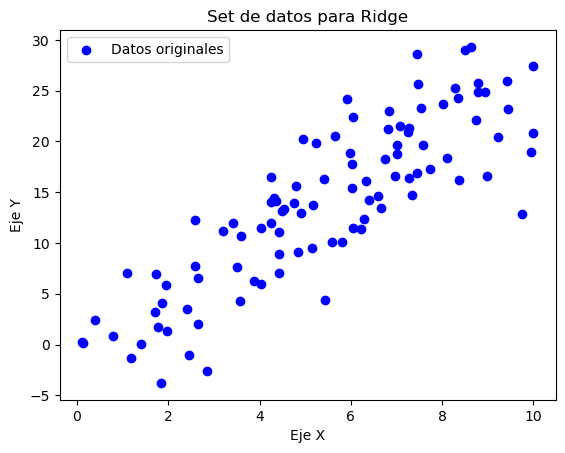

In [173]:
# Generar un set de datos de juguete para regresión de Ridge
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
x_ridge = np.random.rand(100) * 10  # 100 valores entre 0 y 10
y_ridge = 2.5 * x_ridge + np.random.randn(100) * 5  # Relación lineal con ruido

# Graficar los datos
plt.scatter(x_ridge, y_ridge, color='blue', label='Datos originales')
plt.title('Set de datos para Ridge')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

In [174]:
# Hacer una regresión lineal sencilla para comparar con la regresión de Ridge
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Ajustar el modelo a los datos
linear_model.fit(x_ridge.reshape(-1, 1), y_ridge)

# Obtener los parámetros
interseccion_lineal = linear_model.intercept_
pendiente_lineal = linear_model.coef_[0]

# Mostrar los parámetros
print("Intersección (Lineal):", interseccion_lineal)
print("Pendiente (Lineal):", pendiente_lineal)

Intersección (Lineal): -0.7427786566600307
Pendiente (Lineal): 2.6952730081994023


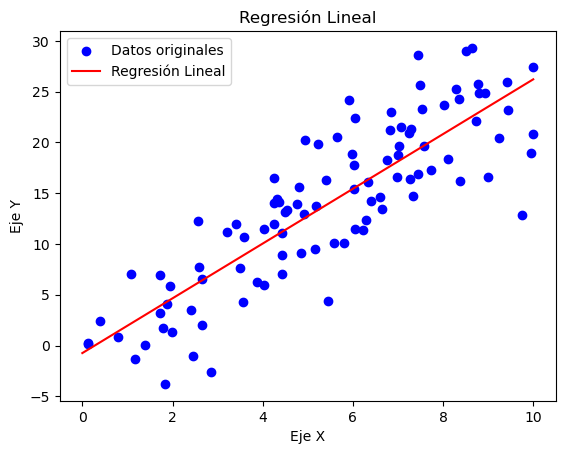

In [175]:
# Generar 100 datos para graficar la línea de predicción
x_pred = np.linspace(0, 10, 100)
y_pred_lineal = pendiente_lineal * x_pred + interseccion_lineal

# Graficar los datos originales y la línea de predicción
plt.scatter(x_ridge, y_ridge, color='blue', label='Datos originales')
plt.plot(x_pred, y_pred_lineal, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

In [176]:
#graficar 


In [177]:
# Importar Ridge para hacer nuestra regresión de cresta
from sklearn.linear_model import Ridge

# Crear el modelo de regresión de Ridge
ridge_model = Ridge(alpha=1.0)

# Ajustar el modelo a los datos
ridge_model.fit(x_ridge.reshape(-1, 1), y_ridge)

# Obtener los parámetros
interseccion_ridge = ridge_model.intercept_
pendiente_ridge = ridge_model.coef_[0]

# Mostrar los parámetros
print("Intersección (Ridge):", interseccion_ridge)
print("Pendiente (Ridge):", pendiente_ridge)

Intersección (Ridge): -0.7202870999023734
Pendiente (Ridge): 2.691142704289492


In [178]:
# Calcular los parámetros de Ridge
print("Intersección (Ridge):", interseccion_ridge)
print("Pendiente (Ridge):", pendiente_ridge)

Intersección (Ridge): -0.7202870999023734
Pendiente (Ridge): 2.691142704289492


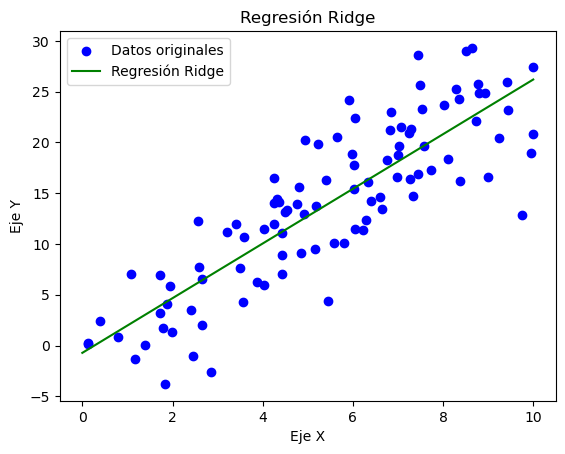

In [179]:
# Hacer la línea de la predicción de Ridge
y_pred_ridge = pendiente_ridge * x_pred + interseccion_ridge

# Graficar los datos originales y la línea de predicción de Ridge
plt.scatter(x_ridge, y_ridge, color='blue', label='Datos originales')
plt.plot(x_pred, y_pred_ridge, color='green', label='Regresión Ridge')
plt.title('Regresión Ridge')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

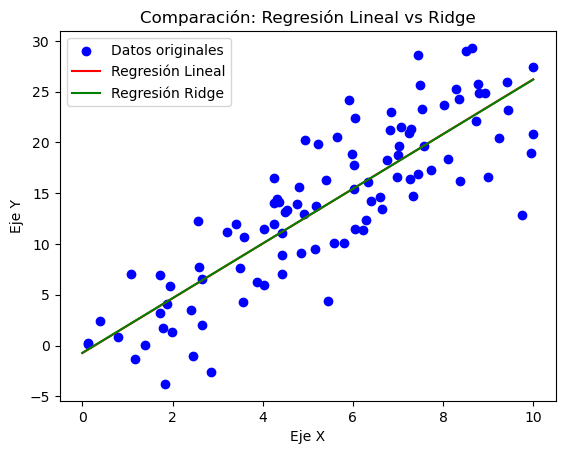

In [180]:
# Graficar comparando la regresión lineal y de Ridge
plt.scatter(x_ridge, y_ridge, color='blue', label='Datos originales')
plt.plot(x_pred, y_pred_lineal, color='red', label='Regresión Lineal')
plt.plot(x_pred, y_pred_ridge, color='green', label='Regresión Ridge')
plt.title('Comparación: Regresión Lineal vs Ridge')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

***

### <span style="color:blue">5.2 Regresión de Lasso</span>

**Función de costo de la regresión de regresión de Lasso**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [181]:
# Importar Lasso
from sklearn.linear_model import Lasso

# Asignar una alpha de 0.1
lasso_model = Lasso(alpha=0.1)

In [182]:
# Entrenar el modelo Lasso
lasso_model.fit(x_train, y_train)

# Calcular los parámetros de intersección y coeficientes de x
intercepto_lasso = lasso_model.intercept_
coeficientes_lasso = lasso_model.coef_
print(f"Intersección: {intercepto_lasso}")
print(f"Coeficientes: {coeficientes_lasso}")

Intersección: -22.725307612056483
Coeficientes: [13.18692663]


In [183]:
# Hacer la línea de la predicción de Lasso
import numpy as np
x_pred = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
y_pred_lasso = lasso_model.predict(x_pred)

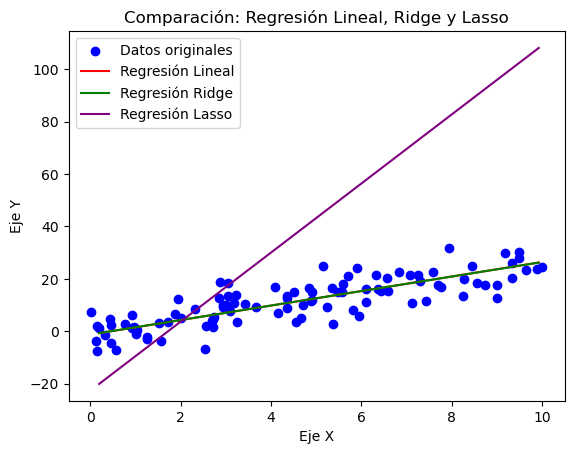

In [184]:
# Graficar comparando la regresión lineal, de Ridge y de Lasso
plt.scatter(x, y, color='blue', label='Datos originales')
plt.plot(x_pred, y_pred_lineal, color='red', label='Regresión Lineal')
plt.plot(x_pred, y_pred_ridge, color='green', label='Regresión Ridge')
plt.plot(x_pred, y_pred_lasso, color='purple', label='Regresión Lasso')
plt.title('Comparación: Regresión Lineal, Ridge y Lasso')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

***

### <span style="color:blue">5.3 Regresión de Red Elástica</span>

**Función de costo de la Regresión de Red Elástica**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [185]:
# Importar ElasticNet
from sklearn.linear_model import ElasticNet

In [186]:
# Calcular los parámetros de intersección y coeficientes de x
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)
intercepto_elastic = elastic_net_model.intercept_
coeficientes_elastic = elastic_net_model.coef_
print(f"Intersección: {intercepto_elastic}")
print(f"Coeficientes: {coeficientes_elastic}")

Intersección: -22.337548644958773
Coeficientes: [13.10949866]


In [187]:
# Hacer la línea de la predicción de Red Elástica
x_pred_elastic = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
y_pred_elastic = elastic_net_model.predict(x_pred_elastic)

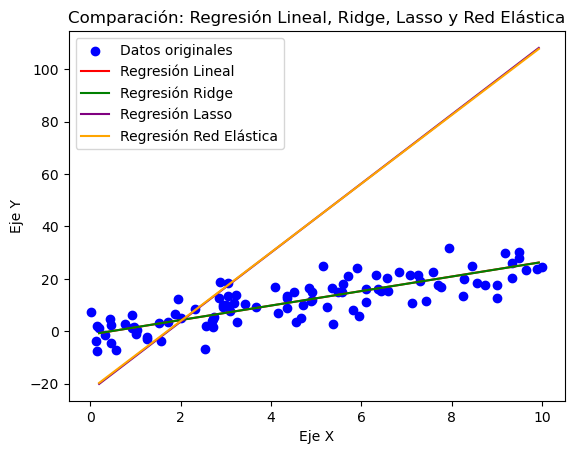

In [188]:
# Graficar comparando la regresión lineal, de Ridge, de Lasso y de Red Elástica
plt.scatter(x, y, color='blue', label='Datos originales')
plt.plot(x_pred, y_pred_lineal, color='red', label='Regresión Lineal')
plt.plot(x_pred, y_pred_ridge, color='green', label='Regresión Ridge')
plt.plot(x_pred, y_pred_lasso, color='purple', label='Regresión Lasso')
plt.plot(x_pred_elastic, y_pred_elastic, color='orange', label='Regresión Red Elástica')
plt.title('Comparación: Regresión Lineal, Ridge, Lasso y Red Elástica')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

***

## <span style="color:green">6. Regresión Logistica</span>

**Modelo de Regresión Logística**

$ \hat{p} = L(b^Tx) $

**Función logística**

$ L = \frac {1}{1+e^{-t}} $

**Función de Costo de la Regresión Logística**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivada de la función de Costo**

$ \frac{\partial}{\partial b} J(b) $

   gmat  gpa  work_experience  admitted
0   780  4.0                3         1
1   750  3.9                4         1
2   690  3.3                3         0
3   710  3.7                5         1
4   680  3.9                4         0


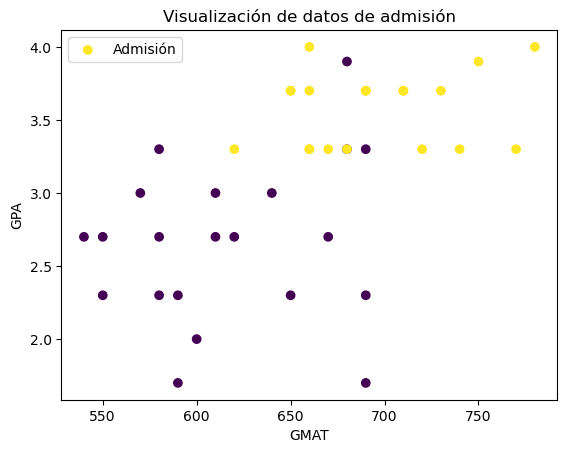

In [189]:
# Traer el set de datos
import pandas as pd
import matplotlib.pyplot as plt

candidates = {
    'gmat': [780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710, 680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670, 660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590, 690],
    'gpa': [4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3, 3, 2.7, 3.7, 2.7, 2.3, 3.3, 2, 2.3, 2.7, 3, 3.3, 3.7, 2.3, 3.7, 3.3, 3, 2.7, 4, 3.3, 3.3, 2.3, 2.7, 3.3, 1.7, 3.7],
    'work_experience': [3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3, 1, 4, 6, 2, 3, 2, 1, 4, 1, 2, 6, 4, 2, 6, 5, 1, 2, 4, 6, 5, 1, 2, 1, 4, 5],
    'admitted': [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
}

data = pd.DataFrame(candidates)

# Visualizar el set de datos
print(data.head())
plt.scatter(data['gmat'], data['gpa'], c=data['admitted'], cmap='viridis', label='Admisión')
plt.xlabel('GMAT')
plt.ylabel('GPA')
plt.title('Visualización de datos de admisión')
plt.legend()
plt.show()

**KEY:** 
gmat: prueba de coeficiente intelectual
gpa: es tu promedio en la escuela

In [190]:
# Dividir el set de datos en las variables predichas y la variable a predecir
from sklearn.model_selection import train_test_split

X = data[['gmat', 'gpa', 'work_experience']]
y = data['admitted']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Conjunto de entrenamiento:")
print(X_train.head())
print("Conjunto de prueba:")
print(X_test.head())

Conjunto de entrenamiento:
    gmat  gpa  work_experience
39   690  3.7                5
6    690  2.3                1
25   670  3.3                6
9    690  1.7                1
13   680  3.3                4
Conjunto de prueba:
    gmat  gpa  work_experience
19   590  2.3                3
16   580  2.7                4
15   610  3.0                1
26   660  3.7                4
4    680  3.9                4


In [191]:
# Importar LogisticRegression
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

In [192]:
# Hacer las predicciones
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.875


In [193]:
# Visualizar y_pred
print("Predicciones del modelo:")
print(y_pred)

Predicciones del modelo:
[0 0 0 1 1 1 0 0]


In [194]:
# Utilizar la función predict_proba para visualizar la probabilidad de que sea admitido
probs = logistic_model.predict_proba(X_test)
print("Probabilidades de admisión:")
print(probs)

Probabilidades de admisión:
[[0.93520025 0.06479975]
 [0.8202288  0.1797712 ]
 [0.97063967 0.02936033]
 [0.24908211 0.75091789]
 [0.15319946 0.84680054]
 [0.01705511 0.98294489]
 [0.97849898 0.02150102]
 [0.97890756 0.02109244]]


In [195]:
# Generar una lista para ver la probabilidad de ser admitidos y a los que no
admitted_probs = probs[:, 1]  # Probabilidad de ser admitido
not_admitted_probs = probs[:, 0]  # Probabilidad de no ser admitido

# Mostrar las probabilidades
for i in range(len(y_test)):
    print(f"Candidato {i+1}: Probabilidad de ser admitido: {admitted_probs[i]:.2f}, Probabilidad de no ser admitido: {not_admitted_probs[i]:.2f}")

Candidato 1: Probabilidad de ser admitido: 0.06, Probabilidad de no ser admitido: 0.94
Candidato 2: Probabilidad de ser admitido: 0.18, Probabilidad de no ser admitido: 0.82
Candidato 3: Probabilidad de ser admitido: 0.03, Probabilidad de no ser admitido: 0.97
Candidato 4: Probabilidad de ser admitido: 0.75, Probabilidad de no ser admitido: 0.25
Candidato 5: Probabilidad de ser admitido: 0.85, Probabilidad de no ser admitido: 0.15
Candidato 6: Probabilidad de ser admitido: 0.98, Probabilidad de no ser admitido: 0.02
Candidato 7: Probabilidad de ser admitido: 0.02, Probabilidad de no ser admitido: 0.98
Candidato 8: Probabilidad de ser admitido: 0.02, Probabilidad de no ser admitido: 0.98


In [196]:
# Incluir estas listas en nuestro dataframe
import pandas as pd

# Crear un DataFrame con los datos de prueba y las probabilidades
data = {
    'Candidato': [f'Candidato {i+1}' for i in range(len(y_test))],
    'Probabilidad Admitido': admitted_probs,
    'Probabilidad No Admitido': not_admitted_probs
}

prob_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(prob_df)

     Candidato  Probabilidad Admitido  Probabilidad No Admitido
0  Candidato 1               0.064800                  0.935200
1  Candidato 2               0.179771                  0.820229
2  Candidato 3               0.029360                  0.970640
3  Candidato 4               0.750918                  0.249082
4  Candidato 5               0.846801                  0.153199
5  Candidato 6               0.982945                  0.017055
6  Candidato 7               0.021501                  0.978499
7  Candidato 8               0.021092                  0.978908


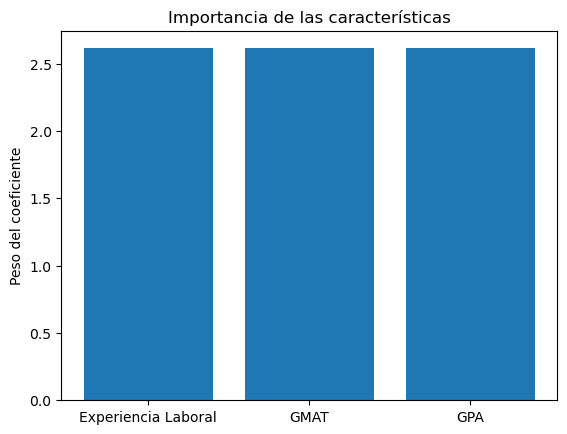

In [197]:
# Visualizar el peso de la experiencia laboral, de gmat y de gpa
import matplotlib.pyplot as plt

# Suponiendo que los coeficientes del modelo están en model.coef_
features = ['Experiencia Laboral', 'GMAT', 'GPA']
coef_values = model.coef_

plt.bar(features, coef_values)
plt.title('Importancia de las características')
plt.ylabel('Peso del coeficiente')
plt.show()

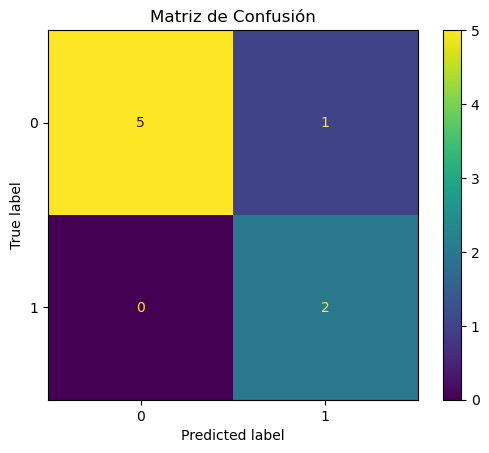

In [198]:
# Evaluar la regresión con métricas como la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Matriz de Confusión')
plt.show()

In [199]:
# Finalizar el análisis con una conclusión
print("El análisis ha concluido. Hemos evaluado el modelo de regresión logística, visualizado las probabilidades, y analizado la importancia de las características.")

El análisis ha concluido. Hemos evaluado el modelo de regresión logística, visualizado las probabilidades, y analizado la importancia de las características.


## <span style="color:green">6. Regresión Softmax</span>

$ claseA(x) = (b^A)^T x $

$ claseB(x) = (b^B)^T x $

$ claseC(x) = (b^C)^T x $

$\hat p_A = L(claseA(x)) $

$ \hat p_B = L(claseB(x))$

$ \hat p_C = L(claseC(x))$

$ L = \frac{e^x}{\sum_{i=1}^{m} e^x }  $

In [200]:
# Importar LogisticRegression
from sklearn.linear_model import LogisticRegression